<a href="https://colab.research.google.com/github/ShashankAlagawadi/PredictiveMaintenance/blob/main/Algorithms_0_5K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.85
              precision    recall  f1-score   support

           1       0.83      0.76      0.79        38
           2       0.91      0.88      0.90        34
           3       0.81      0.93      0.87        28

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.85      0.85      0.85       100



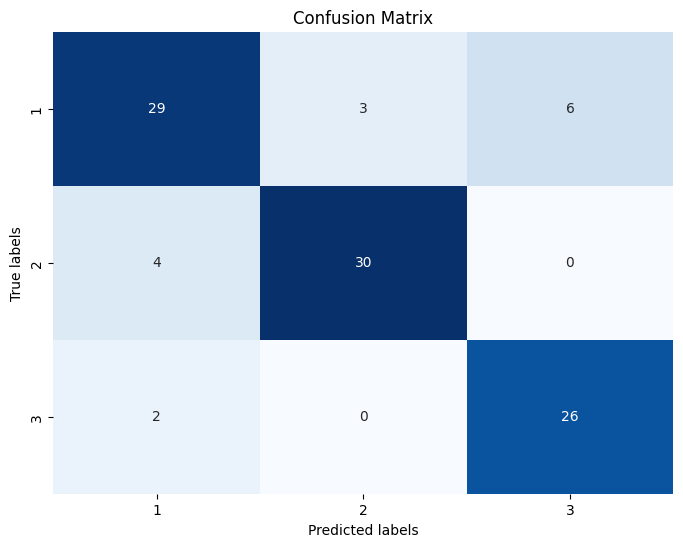

Number of Trees: 1 | Accuracy: 0.79
Number of Trees: 2 | Accuracy: 0.79
Number of Trees: 3 | Accuracy: 0.8
Number of Trees: 4 | Accuracy: 0.8
Number of Trees: 5 | Accuracy: 0.8
Number of Trees: 6 | Accuracy: 0.8
Number of Trees: 7 | Accuracy: 0.81
Number of Trees: 8 | Accuracy: 0.81
Number of Trees: 9 | Accuracy: 0.81
Number of Trees: 10 | Accuracy: 0.81
Number of Trees: 11 | Accuracy: 0.82
Number of Trees: 12 | Accuracy: 0.82
Number of Trees: 13 | Accuracy: 0.82
Number of Trees: 14 | Accuracy: 0.82
Number of Trees: 15 | Accuracy: 0.82
Number of Trees: 16 | Accuracy: 0.83
Number of Trees: 17 | Accuracy: 0.83
Number of Trees: 18 | Accuracy: 0.83
Number of Trees: 19 | Accuracy: 0.83
Number of Trees: 20 | Accuracy: 0.83
Number of Trees: 21 | Accuracy: 0.83
Number of Trees: 22 | Accuracy: 0.83
Number of Trees: 23 | Accuracy: 0.83
Number of Trees: 24 | Accuracy: 0.83
Number of Trees: 25 | Accuracy: 0.83
Number of Trees: 26 | Accuracy: 0.84
Number of Trees: 27 | Accuracy: 0.84
Number of Tree

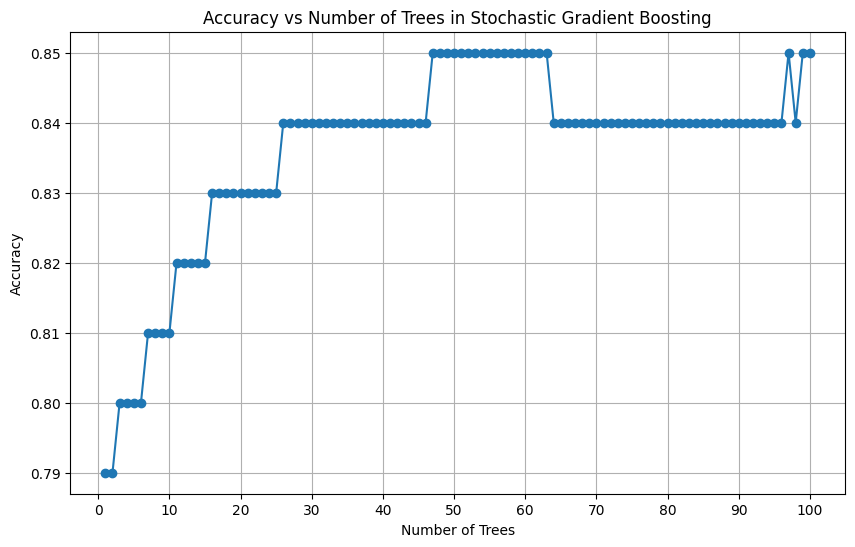

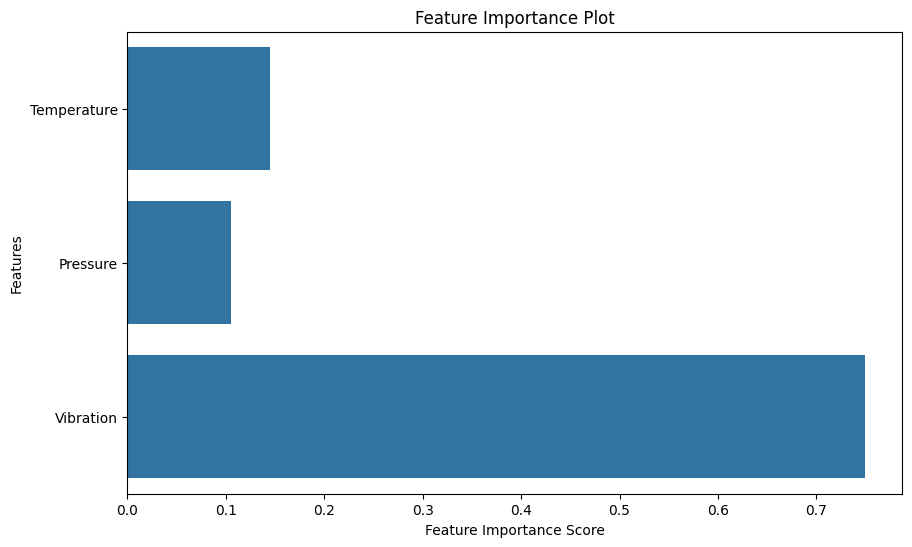

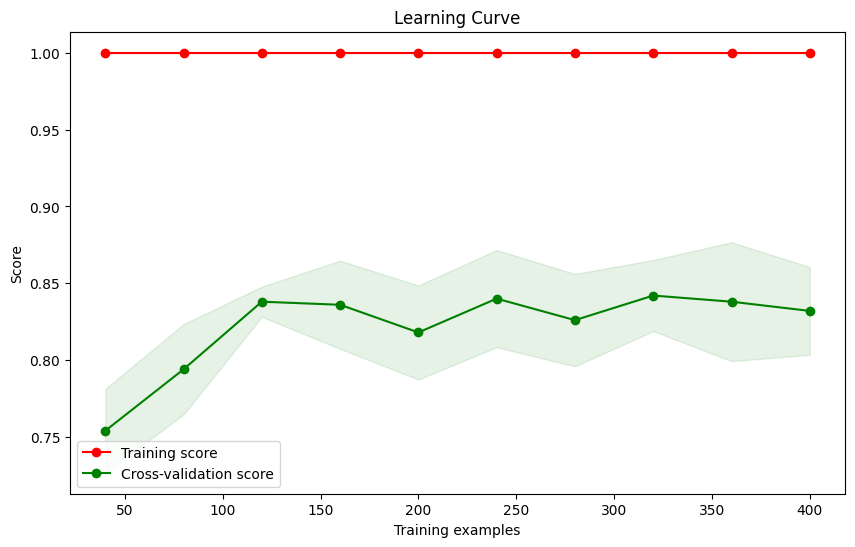

In [ ]:
# Stochastic Gradient Boosting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM05K.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingClassifier
sgb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
sgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = sgb_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    sgb_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
    sgb_classifier.fit(X_train, y_train)
    y_pred = sgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Stochastic Gradient Boosting')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

# Feature Importance
feature_importances = sgb_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    sgb_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()



In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


Learning rate set to 0.5
0:	learn: 0.7086603	total: 52.7ms	remaining: 5.22s
1:	learn: 0.5286206	total: 55.4ms	remaining: 2.72s
2:	learn: 0.4439793	total: 58.1ms	remaining: 1.88s
3:	learn: 0.3856058	total: 60.7ms	remaining: 1.46s
4:	learn: 0.3442045	total: 63.3ms	remaining: 1.2s
5:	learn: 0.3170459	total: 65.7ms	remaining: 1.03s
6:	learn: 0.2942572	total: 68.2ms	remaining: 907ms
7:	learn: 0.2817469	total: 70.9ms	remaining: 815ms
8:	learn: 0.2707033	total: 73.4ms	remaining: 742ms
9:	learn: 0.2590716	total: 75.9ms	remaining: 683ms
10:	learn: 0.2463018	total: 78.5ms	remaining: 635ms
11:	learn: 0.2314054	total: 81ms	remaining: 594ms
12:	learn: 0.2268486	total: 83.4ms	remaining: 558ms
13:	learn: 0.2188122	total: 86.1ms	remaining: 529ms
14:	learn: 0.2118502	total: 88.6ms	remaining: 502ms
15:	learn: 0.2038706	total: 91.1ms	remaining: 479ms
16:	learn: 0.1969387	total: 93.7ms	remaining: 458ms
17:	learn: 0.1909395	total: 97.6ms	remaining: 445ms
18:	learn: 0.1844623	total: 100ms	remaining: 427ms
1

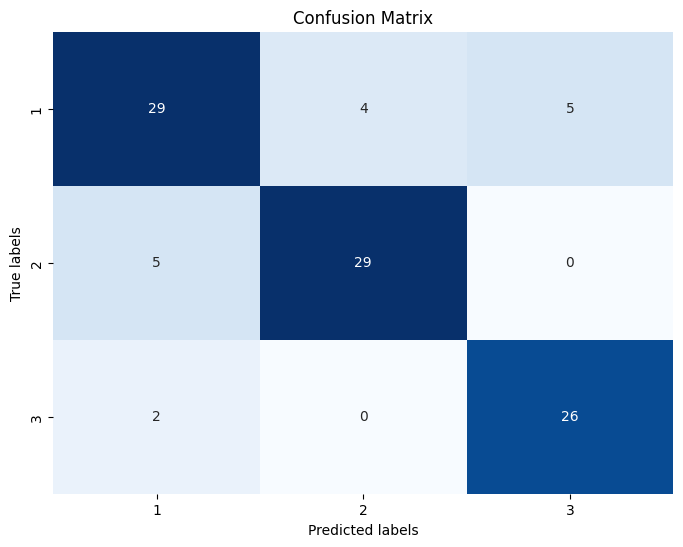

Streaming output truncated to the last 5000 lines.
Learning rate set to 0.5
0:	learn: 0.7086603	total: 2.34ms	remaining: 46.7ms
1:	learn: 0.5286206	total: 4.85ms	remaining: 46.1ms
2:	learn: 0.4439793	total: 7.31ms	remaining: 43.8ms
3:	learn: 0.3856058	total: 9.73ms	remaining: 41.4ms
4:	learn: 0.3442045	total: 12.3ms	remaining: 39.4ms
5:	learn: 0.3170459	total: 14.7ms	remaining: 36.7ms
6:	learn: 0.2942572	total: 17.2ms	remaining: 34.3ms
7:	learn: 0.2817469	total: 19.6ms	remaining: 31.8ms
8:	learn: 0.2707033	total: 22.7ms	remaining: 30.3ms
9:	learn: 0.2590716	total: 25.4ms	remaining: 28ms
10:	learn: 0.2463018	total: 28ms	remaining: 25.5ms
11:	learn: 0.2314054	total: 30.4ms	remaining: 22.8ms
12:	learn: 0.2268486	total: 32.9ms	remaining: 20.2ms
13:	learn: 0.2188122	total: 35.3ms	remaining: 17.7ms
14:	learn: 0.2118502	total: 37.7ms	remaining: 15.1ms
15:	learn: 0.2038706	total: 40.5ms	remaining: 12.6ms
16:	learn: 0.1969387	total: 43.2ms	remaining: 10.2ms
17:	learn: 0.1909395	total: 45.7ms	re

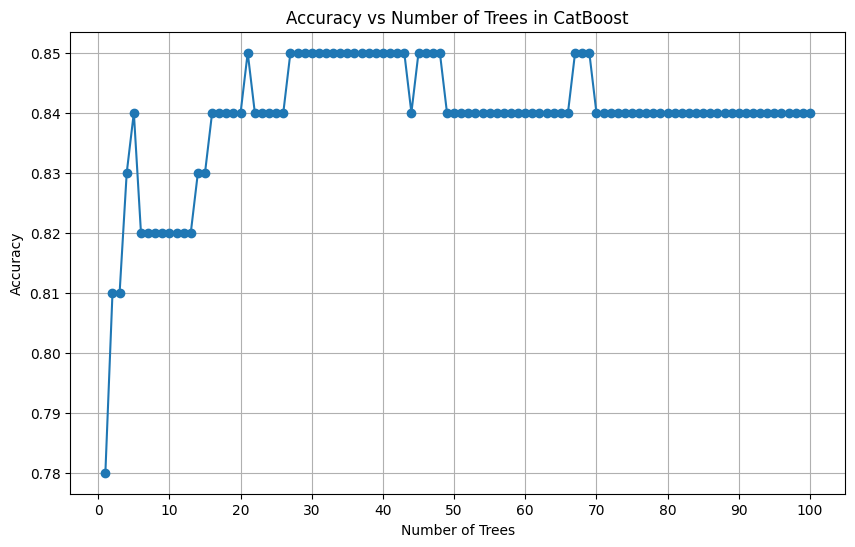

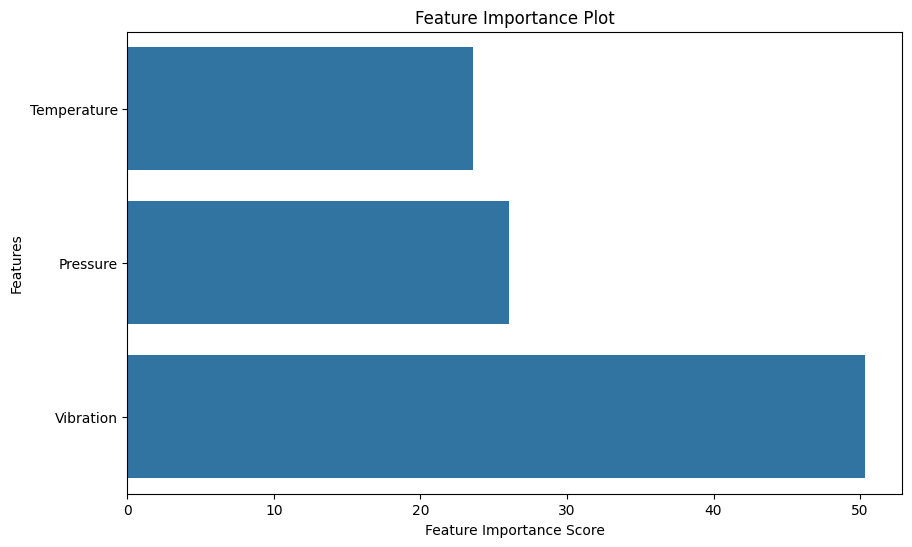

Streaming output truncated to the last 5000 lines.
49:	learn: 0.0329369	total: 40.7ms	remaining: 40.7ms
50:	learn: 0.0322452	total: 41.4ms	remaining: 39.8ms
51:	learn: 0.0315969	total: 42.1ms	remaining: 38.8ms
52:	learn: 0.0309113	total: 42.7ms	remaining: 37.9ms
53:	learn: 0.0303946	total: 43.2ms	remaining: 36.8ms
54:	learn: 0.0298724	total: 43.8ms	remaining: 35.8ms
55:	learn: 0.0292172	total: 44.4ms	remaining: 34.9ms
56:	learn: 0.0285433	total: 45ms	remaining: 34ms
57:	learn: 0.0279540	total: 45.7ms	remaining: 33.1ms
58:	learn: 0.0274567	total: 46.4ms	remaining: 32.2ms
59:	learn: 0.0269211	total: 47.9ms	remaining: 32ms
60:	learn: 0.0262198	total: 49.2ms	remaining: 31.5ms
61:	learn: 0.0256922	total: 50.5ms	remaining: 31ms
62:	learn: 0.0251180	total: 51.9ms	remaining: 30.5ms
63:	learn: 0.0246543	total: 52.4ms	remaining: 29.5ms
64:	learn: 0.0241174	total: 52.9ms	remaining: 28.5ms
65:	learn: 0.0235961	total: 53.7ms	remaining: 27.7ms
66:	learn: 0.0232471	total: 54.5ms	remaining: 26.8ms
67:

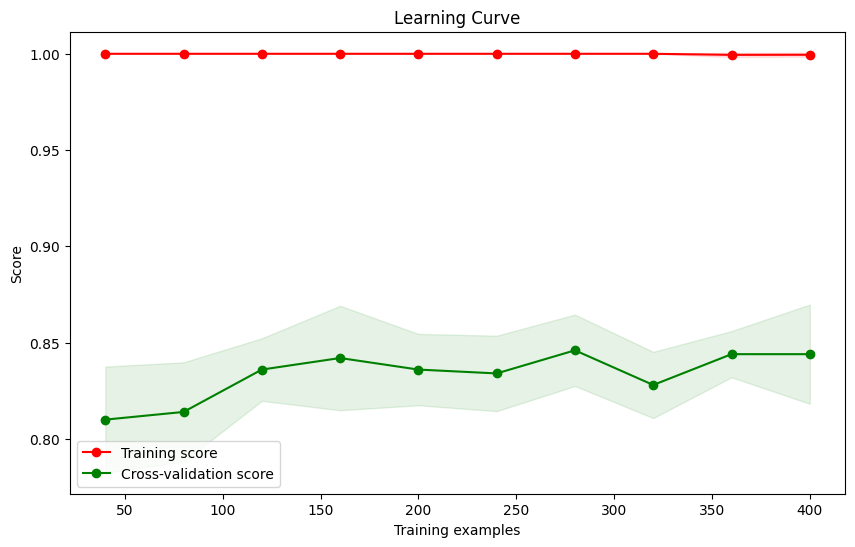

In [ ]:
#Catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM05K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
catboost_classifier = CatBoostClassifier(n_estimators=100, random_state=42)
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    catboost_classifier = CatBoostClassifier(n_estimators=num_trees, random_state=42)
    catboost_classifier.fit(X_train, y_train)
    y_pred = catboost_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in CatBoost')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = catboost_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    catboost_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


Accuracy: 0.85
              precision    recall  f1-score   support

           1       0.85      0.74      0.79        38
           2       0.91      0.88      0.90        34
           3       0.79      0.96      0.87        28

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.85      0.85      0.85       100



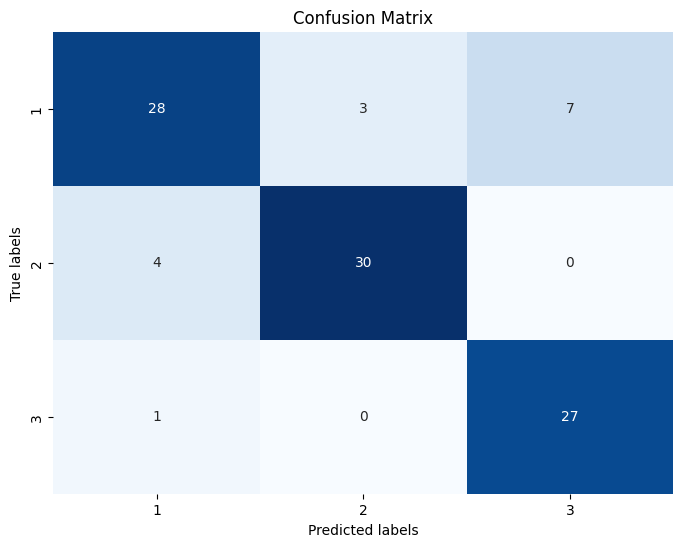

Number of Trees: 1 | Accuracy: 0.75
Number of Trees: 2 | Accuracy: 0.82
Number of Trees: 3 | Accuracy: 0.79
Number of Trees: 4 | Accuracy: 0.82
Number of Trees: 5 | Accuracy: 0.81
Number of Trees: 6 | Accuracy: 0.81
Number of Trees: 7 | Accuracy: 0.81
Number of Trees: 8 | Accuracy: 0.8
Number of Trees: 9 | Accuracy: 0.81
Number of Trees: 10 | Accuracy: 0.8
Number of Trees: 11 | Accuracy: 0.82
Number of Trees: 12 | Accuracy: 0.81
Number of Trees: 13 | Accuracy: 0.83
Number of Trees: 14 | Accuracy: 0.84
Number of Trees: 15 | Accuracy: 0.82
Number of Trees: 16 | Accuracy: 0.84
Number of Trees: 17 | Accuracy: 0.83
Number of Trees: 18 | Accuracy: 0.85
Number of Trees: 19 | Accuracy: 0.84
Number of Trees: 20 | Accuracy: 0.84
Number of Trees: 21 | Accuracy: 0.84
Number of Trees: 22 | Accuracy: 0.84
Number of Trees: 23 | Accuracy: 0.84
Number of Trees: 24 | Accuracy: 0.84
Number of Trees: 25 | Accuracy: 0.84
Number of Trees: 26 | Accuracy: 0.84
Number of Trees: 27 | Accuracy: 0.84
Number of Tr

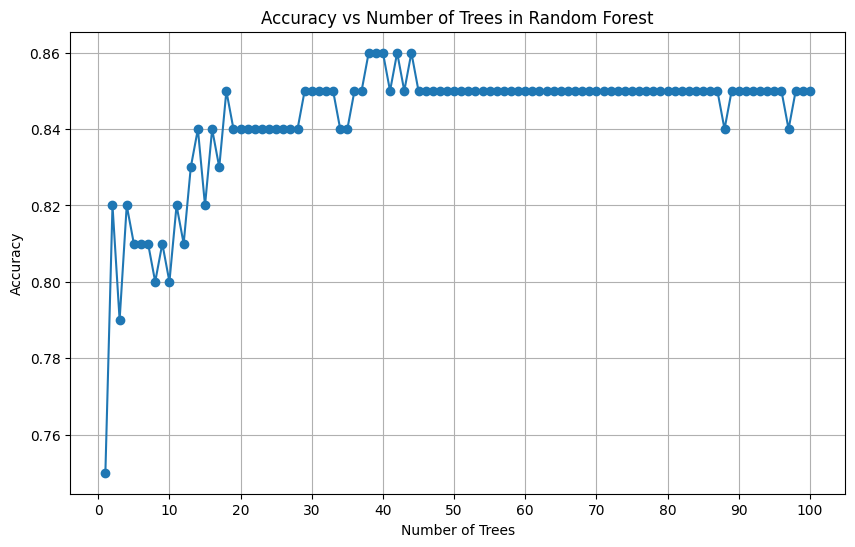

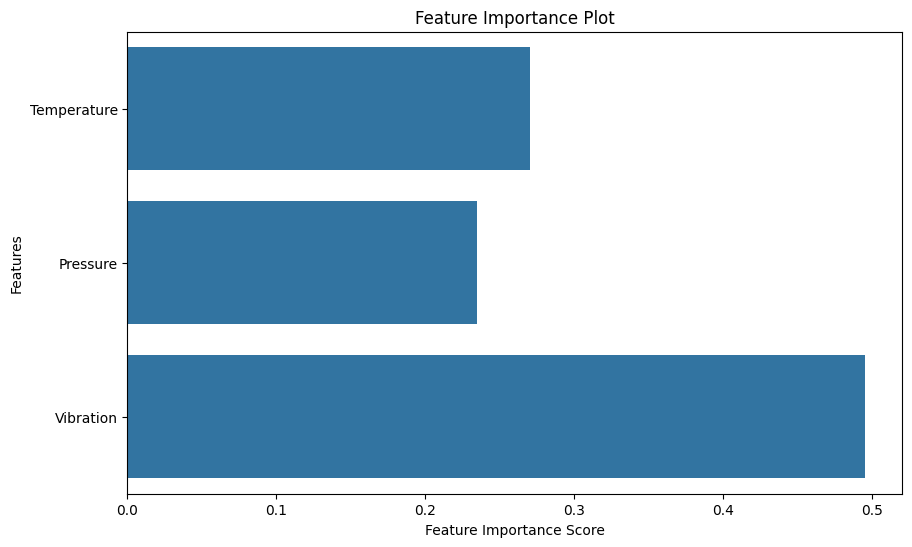

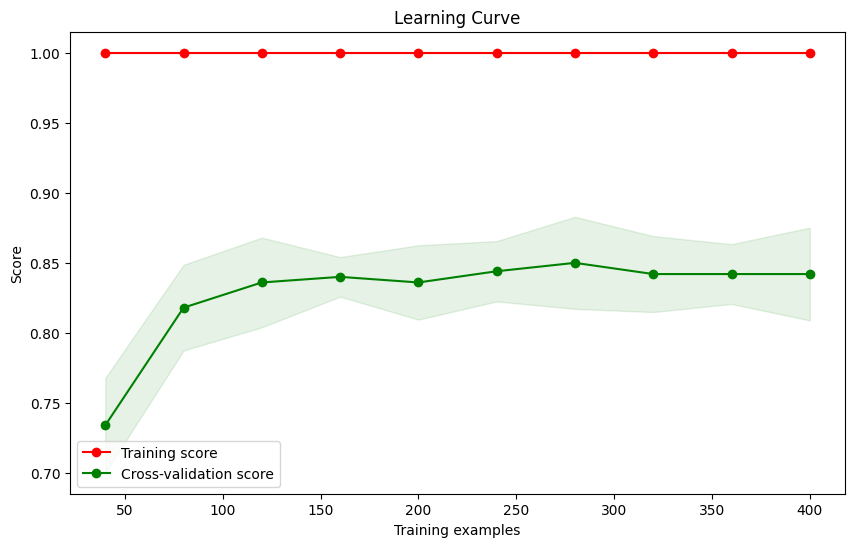

In [ ]:
#Binary class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/PDM05K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
# num_trees_range = range(1, 101)
# accuracies = []

# for num_trees in num_trees_range:
#     rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
#     rf_classifier.fit(X_train, y_train)
#     y_pred = rf_classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)

# plt.figure(figsize=(10, 6))
# plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
# plt.title('Accuracy vs Number of Trees in Random Forest')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.xticks(np.arange(0, 101, step=10))
# plt.grid(True)
# plt.show()
# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


